In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon
from scipy.spatial import KDTree
import numpy as np

# Additional imports
import pystac_client
import xarray as xr
import pathlib
import os
import geopandas as gpd
import matplotlib as mpl
from matplotlib import colors
import rasterio

import cartopy.crs as ccrs
import cartopy
import plotly.graph_objects as go
import plotly.express as px
from rasterio.plot import show

import matplotlib.colors as mcolors
from shapely.geometry import Point
import pandas as pd

from tqdm import tqdm

import webbrowser
from pathlib import Path
import os
import time

from itertools import compress
import pandas as pd

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio

from tqdm import tqdm

from shapely.geometry import box



In [2]:
# opening STAC catalog

catalog = pystac_client.Client.open(
    #"https://storage.googleapis.com/dgds-data-public/coclico/coclico-stac/catalog.json" # cloud API
    "https://storage.googleapis.com/dgds-data-public/gca/SOTC/gca-stac_sotc/catalog.json" # P drive API 
)
#catalog

c:\Users\rowe\AppData\Local\miniconda3\envs\coclico\Lib\site-packages\pystac_client\client.py:186: NoConformsTo: Server does not advertise any conformance classes.
  warnings.warn(NoConformsTo())


In [3]:
list(catalog.get_children())

[<CollectionClient id=shore_mon_fut>,
 <CollectionClient id=sed_class>,
 <CollectionClient id=shore_mon>,
 <CollectionClient id=world_pop>,
 <CollectionClient id=world_gdp>,
 <CollectionClient id=shore_mon_hr>,
 <CollectionClient id=shore_mon_drivers>,
 <CollectionClient id=esl_gwl>,
 <CollectionClient id=sub_threat>,
 <CollectionClient id=Exp_world_pop>,
 <CollectionClient id=Exp_world_pop_parquet>,
 <CollectionClient id=Haz-ESL>,
 <CollectionClient id=Vul-Inf_Mort>,
 <CollectionClient id=Haz-GCM_90-100>,
 <CollectionClient id=Exp-NS_Slopes>,
 <CollectionClient id=Vul_MYS>,
 <CollectionClient id=Vul_RS>,
 <CollectionClient id=Haz-GCM_40-50>,
 <CollectionClient id=Haz-ERA5_04-14>,
 <CollectionClient id=Vul-GDP_Cap>,
 <CollectionClient id=Haz-GCM_04-14>,
 <CollectionClient id=Haz-Land_Sub_2010_COGs>,
 <CollectionClient id=Haz-Land_Sub_2040_COGs>,
 <CollectionClient id=Vul-Roads_Density_COGs>,
 <CollectionClient id=Exp-Delta_DEM_COGs>]

In [4]:
href = catalog.get_child("shore_mon").assets["data"].href
ds = xr.open_zarr(href)
ds

<xarray.Dataset>
Dimensions:             (stations: 1837203, time: 38)
Coordinates: (12/18)
    coastline_idint     (stations) float64 dask.array<chunksize=(57413,), meta=np.ndarray>
    continent           (stations) |S23 dask.array<chunksize=(28707,), meta=np.ndarray>
    country             (stations) |S40 dask.array<chunksize=(28707,), meta=np.ndarray>
    country_id          (stations) |S7 dask.array<chunksize=(114826,), meta=np.ndarray>
    err_changerate      (stations) float64 dask.array<chunksize=(57413,), meta=np.ndarray>
    err_timespan        (stations) float64 dask.array<chunksize=(57413,), meta=np.ndarray>
    ...                  ...
    no_shorelines       (stations) float64 dask.array<chunksize=(57413,), meta=np.ndarray>
    rmse                (stations) float64 dask.array<chunksize=(57413,), meta=np.ndarray>
  * time                (time) datetime64[ns] 1984-01-01 ... 2021-01-01
    timespan            (stations) float64 dask.array<chunksize=(57413,), meta=np.ndarray>
    transect_geom       (stations) |S92 dask.array<chunksize=(14354,), meta=np.ndarray>
    transect_id         (stations) |S15 dask.array<chunksize=(57413,), meta=np.ndarray>
Dimensions without coordinates: stations
Data variables:
    changerate          (stations) float64 dask.array<chunksize=(57413,), meta=np.ndarray>
    changerate_unc      (stations) float64 dask.array<chunksize=(57413,), meta=np.ndarray>
    outliers            (stations, time) float32 dask.array<chunksize=(114826, 3), meta=np.ndarray>
    sandy               (stations) int8 dask.array<chunksize=(459301,), meta=np.ndarray>
    sp                  (stations, time) float64 dask.array<chunksize=(57413, 3), meta=np.ndarray>
Attributes: (12/21)
    AUTHOR:              Luijendijk, A., Hagenaars, G., Ranasinghe, R., Baart...
    CITATION:            Luijendijk, A., Hagenaars, G., Ranasinghe, R. et al....
    COMMENT:             
    CRS:                 EPSG:4326
    Conventions:         CF-1.8
    DESCRIPTION:         The Shoreline Monitor is a dataset that incorporates...
    ...                  ...
    SPATIAL_EXTENT:      [-180, -90, 180, 90]
    TAGS:                ['civil engineering', 'geomorphology', 'shoreline dy...
    TEMPORAL_EXTENT:     ['1984-01-01T00:00:00Z', '2021-01-01T00:00:00Z']
    TITLE:               The Shoreline Monitor
    TITLE_ABBREVIATION:  shore_mon
    UNITS:

In [5]:
# href2='https://storage.googleapis.com/dgds-data-public/coclico/shoreline_change_projections.zarr/global_shoreline_change_projections.zarr'
# ds = xr.open_zarr(href2)
# ds

In [6]:
ds=ds.isel(time=0)
ds.compute()

<xarray.Dataset>
Dimensions:             (stations: 1837203)
Coordinates: (12/18)
    coastline_idint     (stations) float64 5.389e+03 5.389e+03 ... 1.761e+04
    continent           (stations) |S23 b'South America' ... b'Europe'
    country             (stations) |S40 b'Chile' b'Chile' ... b'Russia'
    country_id          (stations) |S7 b'CHL' b'CHL' b'CHL' ... b'RUS' b'RUS'
    err_changerate      (stations) float64 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0 1.0
    err_timespan        (stations) float64 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0 1.0
    ...                  ...
    no_shorelines       (stations) float64 8.0 13.0 14.0 15.0 ... 36.0 36.0 29.0
    rmse                (stations) float64 23.62 157.5 33.4 ... 60.13 121.2
    time                datetime64[ns] 1984-01-01
    timespan            (stations) float64 21.0 21.0 21.0 ... 36.0 36.0 35.0
    transect_geom       (stations) |S92 b'LINESTRING (-74.3863095545 -50.3776...
    transect_id         (stations) |S15 b'BOX_028_183_0' ... b'BOX_211_067_153'
Dimensions without coordinates: stations
Data variables:
    changerate          (stations) float64 14.09 6.937 2.431 ... 5.909 10.56
    changerate_unc      (stations) float64 1.504 7.718 1.637 ... 1.087 2.716
    outliers            (stations) float32 0.0 1.0 1.0 1.0 ... 1.0 0.0 0.0 0.0
    sandy               (stations) int8 1 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0
    sp                  (stations) float64 nan 414.2 367.2 ... -6.202 23.64 nan
Attributes: (12/21)
    AUTHOR:              Luijendijk, A., Hagenaars, G., Ranasinghe, R., Baart...
    CITATION:            Luijendijk, A., Hagenaars, G., Ranasinghe, R. et al....
    COMMENT:             
    CRS:                 EPSG:4326
    Conventions:         CF-1.8
    DESCRIPTION:         The Shoreline Monitor is a dataset that incorporates...
    ...                  ...
    SPATIAL_EXTENT:      [-180, -90, 180, 90]
    TAGS:                ['civil engineering', 'geomorphology', 'shoreline dy...
    TEMPORAL_EXTENT:     ['1984-01-01T00:00:00Z', '2021-01-01T00:00:00Z']
    TITLE:               The Shoreline Monitor
    TITLE_ABBREVIATION:  shore_mon
    UNITS:

In [7]:
df=ds.to_dataframe()
df

,changerate,changerate_unc,coastline_idint,continent,country,country_id,err_changerate,err_timespan,intercept,intercept_unc,...,no_sedcomp,no_shorelines,outliers,rmse,sandy,sp,time,timespan,transect_geom,transect_id
stations,,,,,,,,,,,,,,,,,,,,,
0,14.088576,1.503763,5389.0,b'South America',b'Chile',b'CHL',1.0,1.0,56.678813,35.137902,...,1.0,8.0,0.0,23.620801,1,NaN,1984-01-01,21.0,"b'LINESTRING (-74.3863095545 -50.3776589451, -...",b'BOX_028_183_0'
1,6.937372,7.717642,5389.0,b'South America',b'Chile',b'CHL',1.0,1.0,297.416535,196.569308,...,1.0,13.0,1.0,157.453404,0,414.190582,1984-01-01,21.0,"b'LINESTRING (-74.382468591 -50.3791437735, -7...",b'BOX_028_183_1'
2,2.430833,1.637254,5389.0,b'South America',b'Chile',b'CHL',1.0,1.0,282.545984,41.701053,...,1.0,14.0,1.0,33.402840,0,367.236267,1984-01-01,21.0,"b'LINESTRING (-74.3786276274 -50.3806285554, -...",b'BOX_028_183_2'
3,4.427241,10.685796,5389.0,b'South America',b'Chile',b'CHL',1.0,1.0,212.780267,278.138758,...,1.0,15.0,1.0,208.282579,0,484.592266,1984-01-01,21.0,b'LINESTRING (-74.3739502728 -50.3825830980000...,b'BOX_028_183_3'
4,4.002978,10.248722,5389.0,b'South America',b'Chile',b'CHL',1.0,1.0,271.142825,255.122503,...,1.0,16.0,0.0,308.598295,0,393.579932,1984-01-01,35.0,"b'LINESTRING (-74.3704249118 -50.3843577821, -...",b'BOX_028_183_4'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1837198,12.993559,2.265287,17612.0,b'Europe',b'Russia',b'RUS',1.0,1.0,21.928761,45.436937,...,1.0,36.0,1.0,116.339704,0,284.891489,1984-01-01,36.0,"b'LINESTRING (39.9299368881 64.7014617708, 39....",b'BOX_211_067_149'
1837199,8.107627,2.017299,17612.0,b'Europe',b'Russia',b'RUS',1.0,1.0,196.397698,44.916515,...,1.0,36.0,1.0,99.278079,0,190.727131,1984-01-01,34.0,"b'LINESTRING (39.9335774372 64.7025859435, 39....",b'BOX_211_067_150'
1837200,1.779037,0.154548,17612.0,b'Europe',b'Russia',b'RUS',1.0,1.0,503.516226,3.161074,...,1.0,36.0,0.0,8.878198,0,-6.202073,1984-01-01,36.0,"b'LINESTRING (39.9355464131 64.7035022455, 39....",b'BOX_211_067_151'


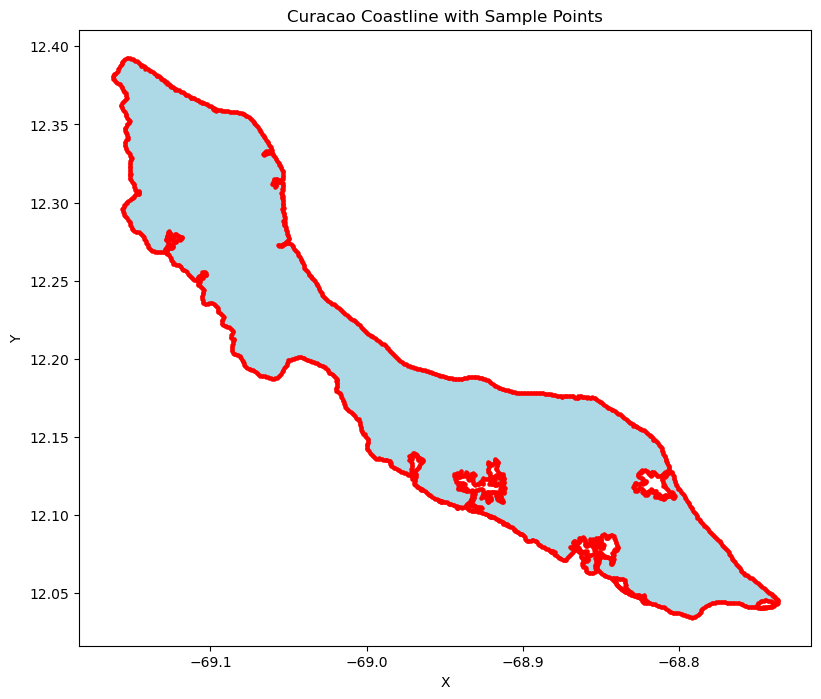

In [8]:
import geopandas as gpd
from shapely.geometry import MultiPolygon, LineString

# Load the GeoDataFrame containing the polygon from the GeoPackage file
polygon_gdf = gpd.read_file(r'P:\11209197-018-global-coastal-atlas\MSc_students\ClenmarRowe\Data\All_Datasets\Orig_Datasets\04_Auxillary_files\Curacao_Polygon.gpkg')
polygon_gdf=polygon_gdf.to_crs(crs="EPSG:4326")

# Merge all geometries into a single MultiPolygon
multi_polygon = polygon_gdf['geometry'].unary_union

# Convert the MultiPolygon to a LineString representing the coastline
coastline_line = LineString(multi_polygon.boundary.coords)

# Create sample points along the coastline
points = []
distance_along_line = 0
while distance_along_line < coastline_line.length:
    point = coastline_line.interpolate(distance_along_line)
    points.append(point)
    distance_along_line += 0.001  # 100 meters spacing

# Create a GeoDataFrame for the points
points_gdf = gpd.GeoDataFrame(geometry=points, crs=polygon_gdf.crs)

# Plot both the coastline and the points
ax = polygon_gdf.plot(color='lightblue', figsize=(10, 8))
points_gdf.plot(ax=ax, color='red', markersize=5)
ax.set_title('Curacao Coastline with Sample Points')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_aspect('equal')


In [9]:
data_points = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.lon, df.lat), crs="EPSG:4326"
)
data_points

xmin, ymin, xmax, ymax = points_gdf.total_bounds
# Create a bounding box polygon
bbox = Polygon([(xmin, ymin), (xmax, ymin), (xmax, ymax), (xmin, ymax)])
# Filter data points within the bounding box
data_points = data_points[data_points.geometry.within(bbox)]

In [ ]:
fig2 = go.Figure(go.Scattermapbox(
    lat=df["lat"],
    lon=df["lon"],
    mode='markers',
    marker=dict(
        size=15,
        color=df["changerate"],  # Set color to red

        # colorscale=color_scale,  # Specify the discrete color scale
        # cmin=1,  # Set the minimum value for the color scale
        # cmax=6,  # Set the maximum value for the color scale
        colorbar=dict(
            # title=f'Curacao chainage starting counterclockwise from lon= {circle_center["geometry"][0].x:.2f} and lat= {circle_center["geometry"][0].y:.2f}'  # Set color bar title?
            title = (
                        f'Curacao along-shoreline chainage <br> (meters)'
                    )            
        )
    ),
    hoverinfo='text',
    hovertext=df["changerate"],
    showlegend=False
))

# Update layout properties
fig2.update_layout(
    # title = f"Curacao Transect Chainage at 100m spacing starting counterclockwise from:<br> Point lon={circle_center['geometry'][0].x:.2f}° and lat={circle_center['geometry'][0].y:.2f}°",
    mapbox_style="carto-positron",
    mapbox=dict(
        zoom=5,
        center=dict(lat=12.18625, lon=-68.95)
    ),		

    margin=dict(l=0, r=50, b=0, t=100),
    legend=dict(
    x=1.15,
    y=1.0,
    traceorder="normal",
    orientation="v"
),
    width=800,  # Set width of the plot
    height=600  # Set height of the plot
)

# Show the plot
fig2.show()


In [ ]:
df.to_csv(r"P:\11209197-018-global-coastal-atlas\MSc_students\ClenmarRowe\Data\Processed_data\01_Hazards\01_Present\Shoreline_Change\Global_Erosion_rate_PC.csv",index=False)

In [ ]:
import geopandas as gpd
df=pd.read_csv(r"P:\11209197-018-global-coastal-atlas\MSc_students\ClenmarRowe\Data\Processed_data\01_Hazards\01_Present\Shoreline_Change\Global_Erosion_rate_PC.csv")
data_points = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.lon, df.lat), crs="EPSG:4326"
)
data_points